# RQ 3 - Posting Times

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from posts import most_common_times, plot_posts_intervals
from collections import Counter

In [2]:
posts = pd.read_csv('data/instagram_posts.csv', sep='\t', usecols=['cts'], parse_dates=['cts'])
posts = posts.dropna()

## What is the most common time in which users publish their posts?
For this problem, we chose to simply count the number of times each post time occurrs in the data set. To simplify things, we only count the hours, as counting unique minutes and seconds would increase the computational complexity without much added gain in the analysis. 

#### 1. Count the number of hours

In [3]:
times, frequencies = most_common_times(posts)

#### 2. Find the time of the maximum number of posts, to be used in the plot

In [4]:
max_time = times[frequencies.index(max(frequencies))]

#### 3. Plot using the plot_date method

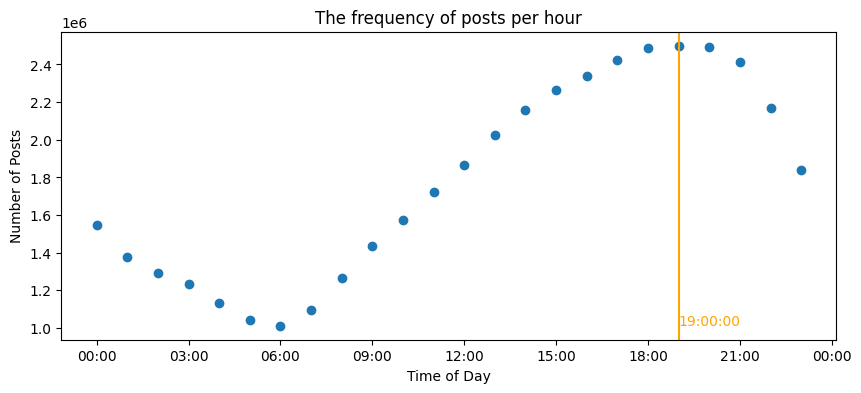

In [5]:
xformatter = mdates.DateFormatter('%H:%M')
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(10, 4)

ax.plot_date(times, frequencies)
ax.xaxis.set_major_formatter(xformatter)
ax.axvline(x = max_time, color = 'orange')
ax.text(x = max_time, y = min(frequencies), s = str(max_time)[11:], color = 'orange')
ax.set_xlabel('Time of Day', fontsize=10);
ax.set_ylabel('Number of Posts', fontsize=10);
ax.set_title('The frequency of posts per hour');

The plots above shows the frequency of posts with a time resolution of hours. From the plot, we can see that most posts are being posted in the evening between 18.00 and midnight. Using an hourly resolution, most posts fall into the interval **19:00 - 20:00**.

We can also see dip in the number of posts between **midnight** and **06:00**, which is expected as most people are sleeping during those hours.

## Plot the number of posts for time intervals
The intervals match what we see in the previous plot about the post frequencies per hour. The peak between **19:00 - 23:00**. we see in the previous plot is represented by the interval **20:00:00 - 23:59:59**.

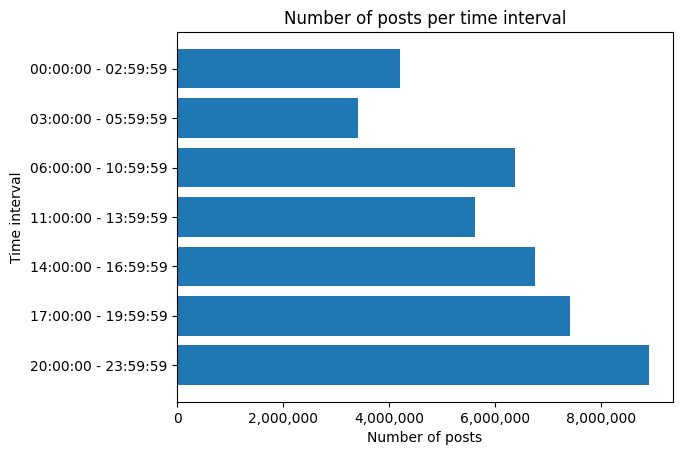

In [6]:
intervals = [("06:00:00", "10:59:59"), ("11:00:00", "13:59:59"), ("14:00:00", "16:59:59"), ("17:00:00", "19:59:59"), ("20:00:00", "23:59:59"), ("00:00:00", "02:59:59"), ("03:00:00",  "05:59:59")]

plot_posts_intervals(posts, intervals);